### 데이터 수집 및 전처리
* 원하는 데이터를 웹에서 수집할 수 있다고 해도 그걸 바로 사용하긴 힘들것
* 왜냐하면 바로 활용하기는 지저분할 수 있기 때문
* 그래서 전처리가 필요

In [1]:
# 서버와 요청을 주고 받는 걸 해줄 수 있는 라이브러리 --> requests
import requests

In [2]:
# 네이버 메인 페이지로 요청
naver_url = 'https://www.naver.com/'
naver_response = requests.get(naver_url)

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
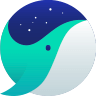
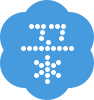

In [3]:
# 이를 문자열로 보자 --> text
naver_response.text

* 그럼 이 중에서 우리가 원하는 부분만 뽑으려면... "BeautifulSoup"

In [5]:
import bs4

naver_bs = bs4.BeautifulSoup(naver_response.text,'lxml') # 대부분 웹에서 requests로 가져오는 데이터는 lxml 옵션으로 입력하면 됨

In [6]:
# find와 find_all 사용
naver_bs.find('span',class_='ah_k')

In [12]:
# find로 찾은 결과에서 내용만 보기
result = naver_bs.find('div',class_='group_nav') # span 태그에 있고, span 태그는 class 속성이 있고, 해당 속성값은 ah_k
result.text

'\n\n\n메일\n\n카페\n블로그\n지식iN\n쇼핑\nPay\n\nTV\n\n\n\n사전\n뉴스\n증권\n부동산\n지도\n영화\nVIBE\n책\n웹툰\n\n\n더보기\n\n서비스 전체보기\n메뉴설정\n초기화\n저장\n\n'

In [13]:
# find_all로 원하는 내용 모두 찾기
naver_bs.find_all('div',class_='group_nav')

[<div class="group_nav">
 <ul class="list_nav type_fix">
 <li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
 <li class="nav_item">
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
 </li>
 </ul>
 <ul class="list_nav NM_FAVORITE_LIST">
 <li class="nav_item"><a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a></li>
 <li clas

In [14]:
# find_all 결과에서 내용만 가져오기
result_list = naver_bs.find_all('div',class_='group_nav')
for div in result_list:
    print(div.text)




메일

카페
블로그
지식iN
쇼핑
Pay

TV



사전
뉴스
증권
부동산
지도
영화
VIBE
책
웹툰


더보기

서비스 전체보기
메뉴설정
초기화
저장




#### 재무데이터 구해오기
* company guide 활용 (ref: https://comp.fnguide.com/svo2/asp/SVD_Main.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701)

* company guide의 url을 통해 알 수 있는 것 --> 종목번호만 바꿔주면 각 종목별 정보창으로 접근할 수 있음

In [17]:
# pandas를 통해 재무제표 페이지에서 테이블들 찾아오기
import pandas as pd

fs_url = "https://comp.fnguide.com/svo2/asp/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
fs_page = requests.get(fs_url)
fs_tables = pd.read_html(fs_page.text)
fs_tables

[                              IFRS(연결)    2017/12    2018/12    2019/12  \
 0                                  매출액  2395754.0  2437714.0  2304009.0   
 1                                 매출원가  1292907.0  1323944.0  1472395.0   
 2                                매출총이익  1102847.0  1113770.0   831613.0   
 3                판매비와관리비계산에 참여한 계정 펼치기   566397.0   524903.0   553928.0   
 4                                 영업이익   536450.0   588867.0   277685.0   
 5                           영업이익(발표기준)   536450.0   588867.0   277685.0   
 6                   금융수익계산에 참여한 계정 펼치기    97374.0    99993.0   101616.0   
 7                   금융원가계산에 참여한 계정 펼치기    89789.0    86089.0    82749.0   
 8                   기타수익계산에 참여한 계정 펼치기    30107.0    14850.0    17787.0   
 9                   기타비용계산에 참여한 계정 펼치기    14196.0    11420.0    14147.0   
 10  종속기업,공동지배기업및관계기업관련손익계산에 참여한 계정 펼치기     2014.0     5398.0     4130.0   
 11                            세전계속사업이익   561960.0   611600.0   304322.0   
 12         

In [18]:
# 포관손익계산서(연간)만 불러오기
fs_tables[0]

,IFRS(연결),2017/12,2018/12,2019/12,2020/09,전년동기,전년동기(%)
0,매출액,2395754.0,2437714.0,2304009.0,1752555.0,1705161.0,2.8
1,매출원가,1292907.0,1323944.0,1472395.0,1066834.0,1086850.0,-1.8
2,매출총이익,1102847.0,1113770.0,831613.0,685721.0,618311.0,10.9
3,판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0,412229.0,1.0
4,영업이익,536450.0,588867.0,277685.0,269469.0,206082.0,30.8
5,영업이익(발표기준),536450.0,588867.0,277685.0,269469.0,206082.0,30.8
6,금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0,78645.0,0.3
7,금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0,63161.0,12.1
8,기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0,11789.0,-6.6
9,기타비용계산에 참여한 계정 펼치기,14196.0,11420.0,14147.0,18618.0,8752.0,112.7


In [19]:
# 데이터 전처리
temp_df = fs_tables[0]
temp_df = temp_df.set_index('IFRS(연결)')
temp_df = temp_df[["2017/12",	"2018/12",	"2019/12", "2020/09"]] # 전년동기 부분은 제거
temp_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
매출원가,1292907.0,1323944.0,1472395.0,1066834.0
매출총이익,1102847.0,1113770.0,831613.0,685721.0
판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0
영업이익,536450.0,588867.0,277685.0,269469.0
영업이익(발표기준),536450.0,588867.0,277685.0,269469.0
금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0
금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0
기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0
